In [ ]:
#Importing libraries 
import pandas as pd
import numpy as np
import pytensor
import pymc as pm
import arviz as az
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="arviz")

In [ ]:
#Reading the df
df = pd.read_csv("lalonde.csv")

In [ ]:
#Inspecting head
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [ ]:
#Inspecting datatypes
df.dtypes

id            int64
treat         int64
age           int64
educ          int64
black         int64
hispan        int64
married       int64
nodegree      int64
re74        float64
re75        float64
re78        float64
dtype: object

In [ ]:
#Inspecting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        614 non-null    int64  
 1   treat     614 non-null    int64  
 2   age       614 non-null    int64  
 3   educ      614 non-null    int64  
 4   black     614 non-null    int64  
 5   hispan    614 non-null    int64  
 6   married   614 non-null    int64  
 7   nodegree  614 non-null    int64  
 8   re74      614 non-null    float64
 9   re75      614 non-null    float64
 10  re78      614 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 52.9 KB


In [ ]:
#Inspecting statistics
df.describe()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,177.390811,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.250000,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,307.500000,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,460.750000,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,614.000000,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


Text(0.5, 1.0, 'counts of treat')

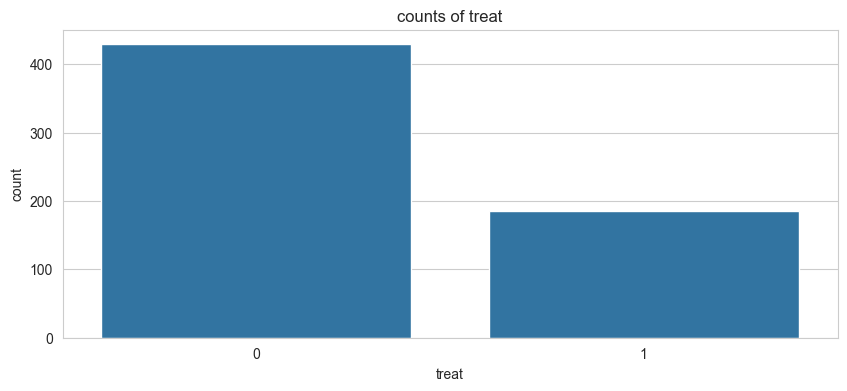

In [ ]:
#Inspecting how many individuals had the treatment
plt.figure(figsize=(10,4))
sns.countplot(data=df,x="treat")
plt.title("counts of treat")

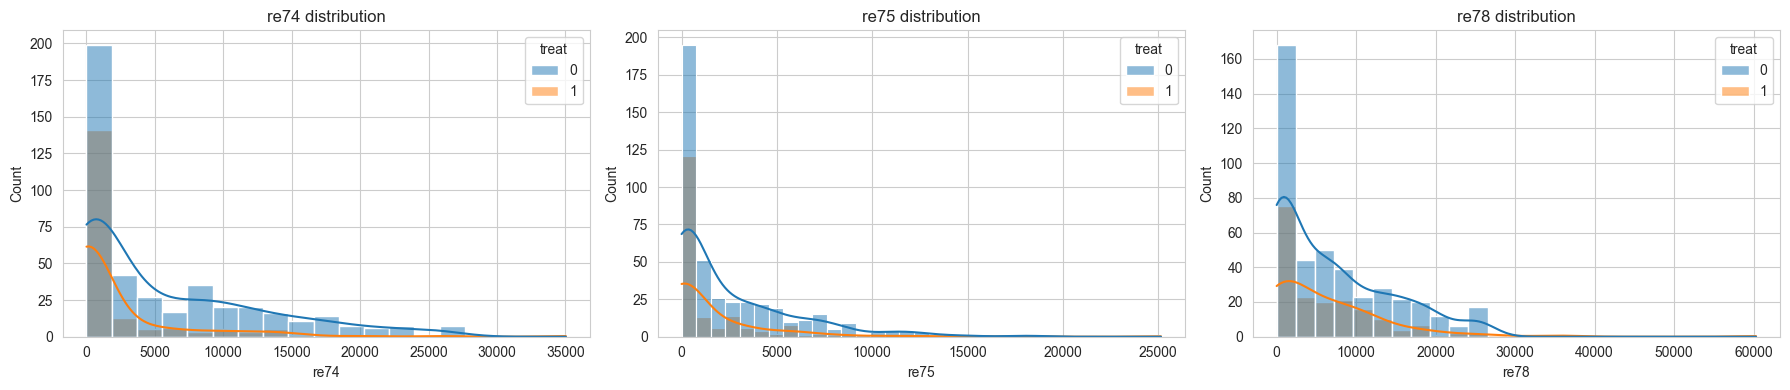

In [ ]:
#Plotting the distribution of incomes before and after the treatment period
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.histplot(data=df, x="re74", kde=True, hue="treat")
plt.title("re74 distribution")
plt.subplot(1,3,2)
sns.histplot(data=df, x="re75", kde=True, hue="treat")
plt.title("re75 distribution")
plt.subplot(1,3,3)
sns.histplot(data=df, x="re78", kde=True, hue="treat")
plt.title("re78 distribution")
plt.tight_layout()
plt.show()

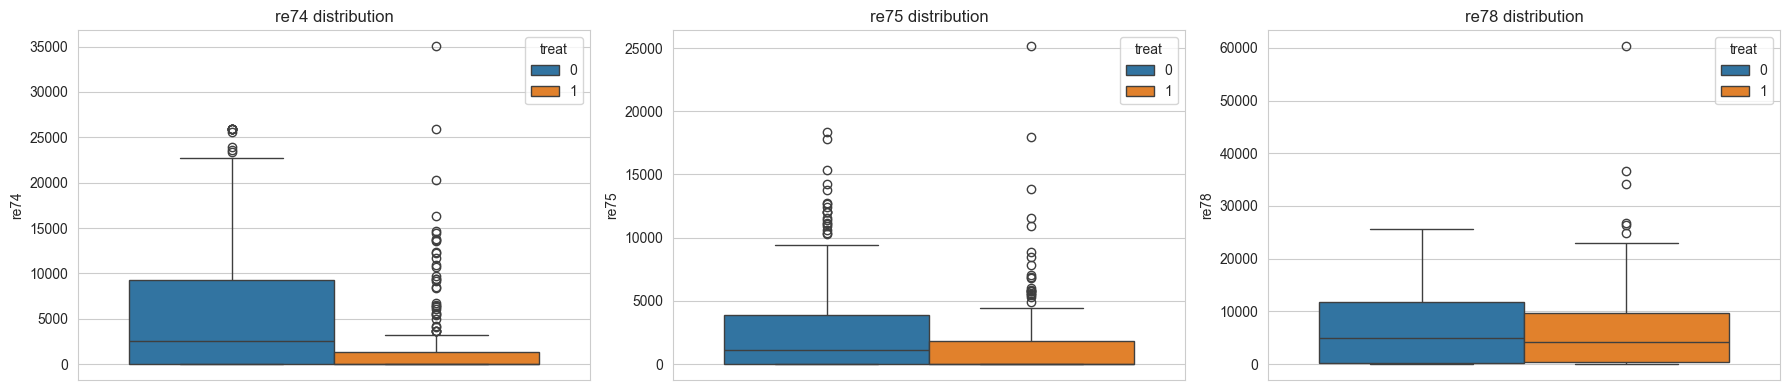

In [ ]:
#Plotting the distribution of incomes before and after the treatment period
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.boxplot(data=df, y="re74", hue="treat")
plt.title("re74 distribution")
plt.subplot(1,3,2)
sns.boxplot(data=df, y="re75", hue="treat")
plt.title("re75 distribution")
plt.subplot(1,3,3)
sns.boxplot(data=df, y="re78", hue="treat")
plt.title("re78 distribution")
plt.tight_layout()
plt.show()

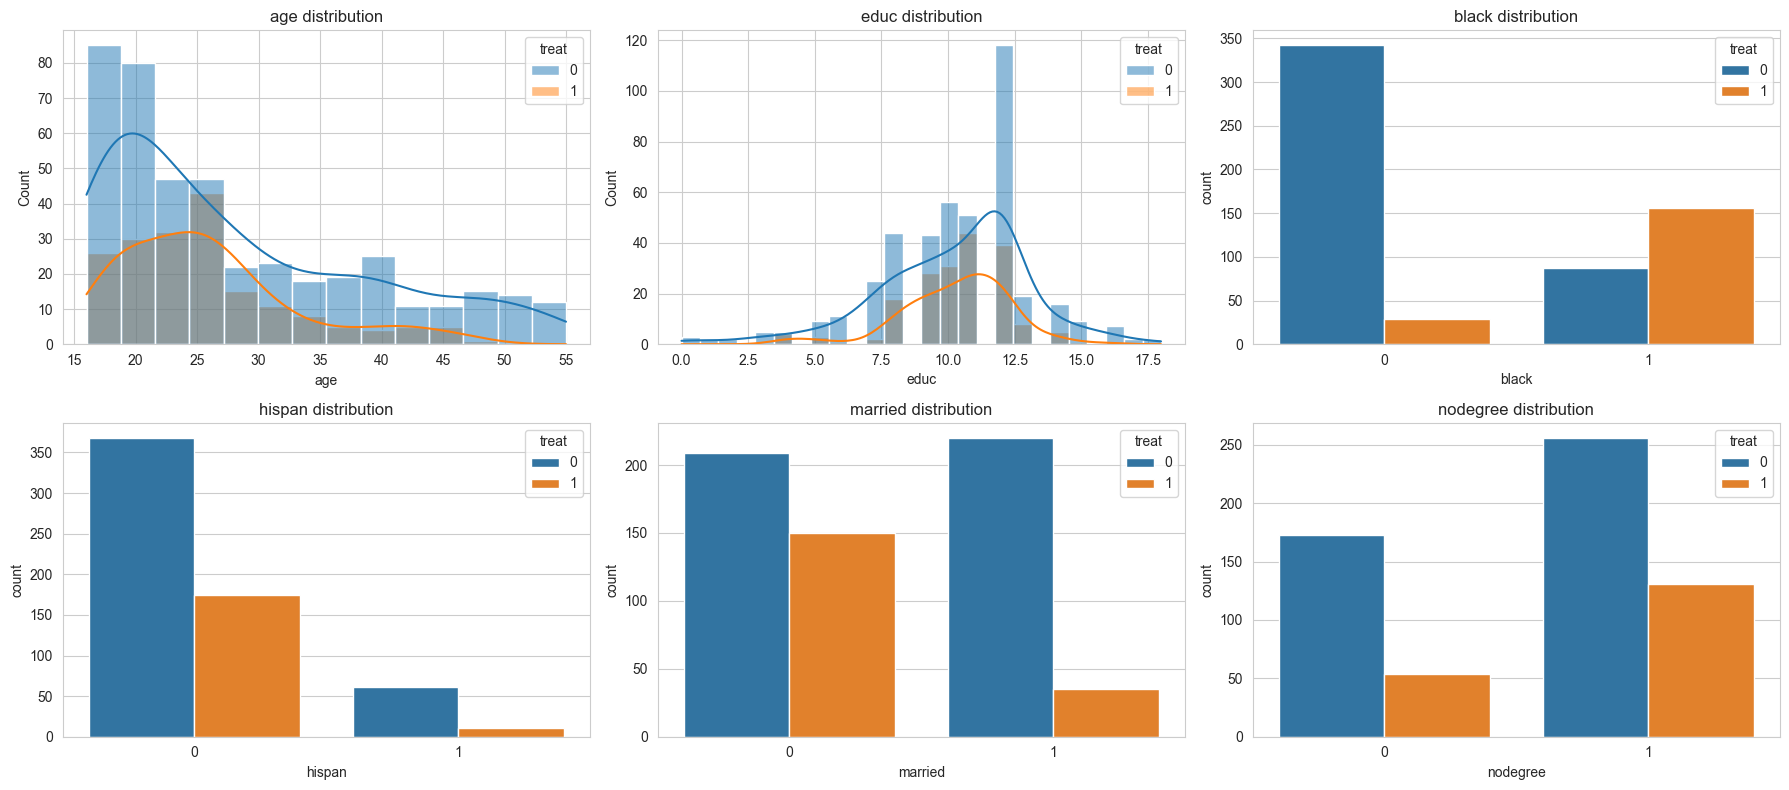

In [ ]:
#Plotting the distribution of the rest of features in the DataFrame
plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
sns.histplot(data=df, x="age", kde=True, hue="treat")
plt.title("age distribution")
plt.subplot(2,3,2)
sns.histplot(data=df, x="educ", kde=True, hue="treat") 
plt.title("educ distribution")
plt.subplot(2,3,3)
sns.countplot(data=df, x="black", hue="treat")
plt.title("black distribution")
plt.subplot(2,3,4)
sns.countplot(data=df, x="hispan", hue="treat")
plt.title("hispan distribution")
plt.subplot(2,3,5)
sns.countplot(data=df, x="married", hue="treat")
plt.title("married distribution")
plt.subplot(2,3,6)
sns.countplot(data=df, x="nodegree", hue="treat")
plt.title("nodegree distribution")
plt.tight_layout()
plt.show()

### Notes:
age distribution - right tailed with a higher representation for the ages ranging between<br>
education distribution - bell curved<br>
black distribution - low representation<br>
hispan distribution - very low representation<br>
married distribtution - most of the subjects are single<br>
no degree distribution - most of the subjects have a degree<br> 

In [ ]:
#Define confounders for the model
covariates = ['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75']
X = df[covariates].values
W = df['treat'].values
y = df['re78'].values

#Binary employment classification status 
is_employed = (y > 0).astype(int)

#Filtering Positive earnings only
pos_mask = y > 0
y_pos = y[pos_mask]
X_pos = X[pos_mask]
W_pos = W[pos_mask]

#Standardizing X
X_std = (X - X.mean(axis=0)) / X.std(axis=0)
X_pos_std = (X_pos - X.mean(axis=0)) / X.std(axis=0)

#Prior for log-earnings
log_mu_guess = np.log(y_pos.mean())

with pm.Model() as causal_model:
    #The Employment Hurdle
    #Intercept, Treatment Effect (gamma_w), and Confounder Weights (gamma_x)
    gamma0 = pm.Normal("gamma0", mu=0, sigma=2)
    gamma_w = pm.Normal("gamma_w", mu=0, sigma=2)
    gamma_x = pm.Normal("gamma_x", mu=0, sigma=1, shape=len(covariates))
    
    #Logit function
    p = pm.math.sigmoid(gamma0 + gamma_w * W + pm.math.dot(X_std, gamma_x))
    pm.Bernoulli("obs_employment", p=p, observed=is_employed)
    
    #The Earnings Level
    #Intercept, Treatment Effect (beta_w), and Confounder Weights (beta_x)
    beta0 = pm.Normal("beta0", mu=log_mu_guess, sigma=0.5)
    beta_w = pm.Normal("beta_w", mu=0, sigma=0.5)
    beta_x = pm.Normal("beta_x", mu=0, sigma=0.5, shape=len(covariates))
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    #Log-Linear function
    mu = beta0 + beta_w * W_pos + pm.math.dot(X_pos_std, beta_x)
    pm.LogNormal("obs_earnings", mu=mu, sigma=sigma, observed=y_pos)
    
    #Causal Estimands
    psi_t = pm.math.sigmoid(gamma0 + gamma_w)
    psi_c = pm.math.sigmoid(gamma0)
    
    mu_t = pm.math.exp(beta0 + beta_w + 0.5 * sigma**2)
    mu_c = pm.math.exp(beta0 + 0.5 * sigma**2)
    
    mean_t = pm.Deterministic("mean_t", psi_t * mu_t)
    mean_c = pm.Deterministic("mean_c", psi_c * mu_c)
    ate = pm.Deterministic("ate", mean_t - mean_c)

In [174]:
#Sampling prior predictive plots
with causal_model:
    prior_predictive = pm.sample_prior_predictive(samples=2000)

Sampling: [beta0, beta_w, beta_x, gamma0, gamma_w, gamma_x, obs_earnings, obs_employment, sigma]


array([<Axes: xlabel='obs_employment'>, <Axes: xlabel='obs_earnings'>],
      dtype=object)

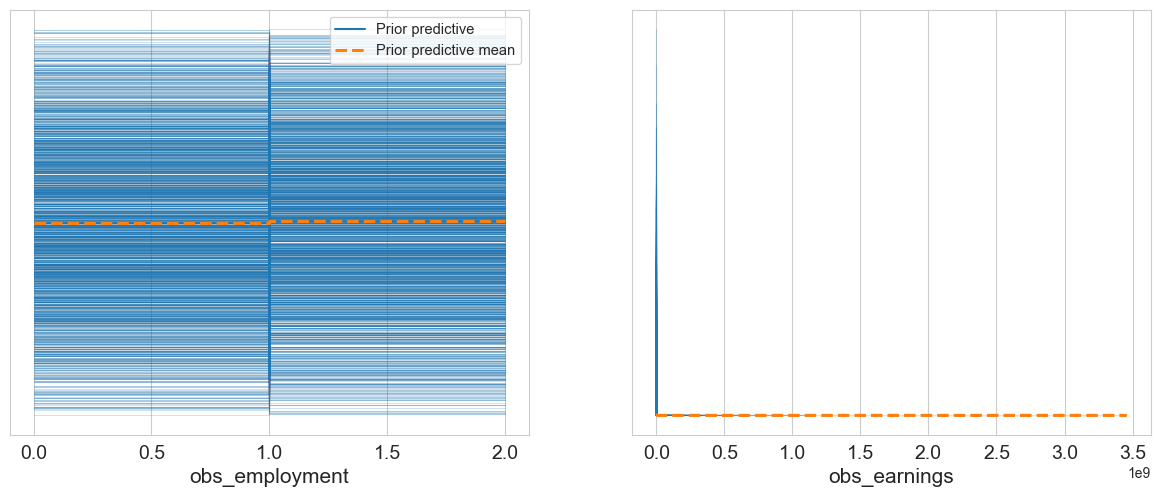

In [157]:
#Visualizng prior predictive checks
az.plot_ppc(prior_predictive, group="prior", kind="kde")

In [158]:
#Sampling the Posterior
with causal_model:
    trace = pm.sample(draws=2000, tune=1000, nuts_sampler="numpyro", target_accept=0.95)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

array([[<Axes: title={'center': 'gamma0'}>,
        <Axes: title={'center': 'gamma0'}>],
       [<Axes: title={'center': 'gamma_w'}>,
        <Axes: title={'center': 'gamma_w'}>],
       [<Axes: title={'center': 'gamma_x'}>,
        <Axes: title={'center': 'gamma_x'}>],
       [<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'beta_w'}>,
        <Axes: title={'center': 'beta_w'}>],
       [<Axes: title={'center': 'beta_x'}>,
        <Axes: title={'center': 'beta_x'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'mean_t'}>,
        <Axes: title={'center': 'mean_t'}>],
       [<Axes: title={'center': 'mean_c'}>,
        <Axes: title={'center': 'mean_c'}>],
       [<Axes: title={'center': 'ate'}>, <Axes: title={'center': 'ate'}>]],
      dtype=object)

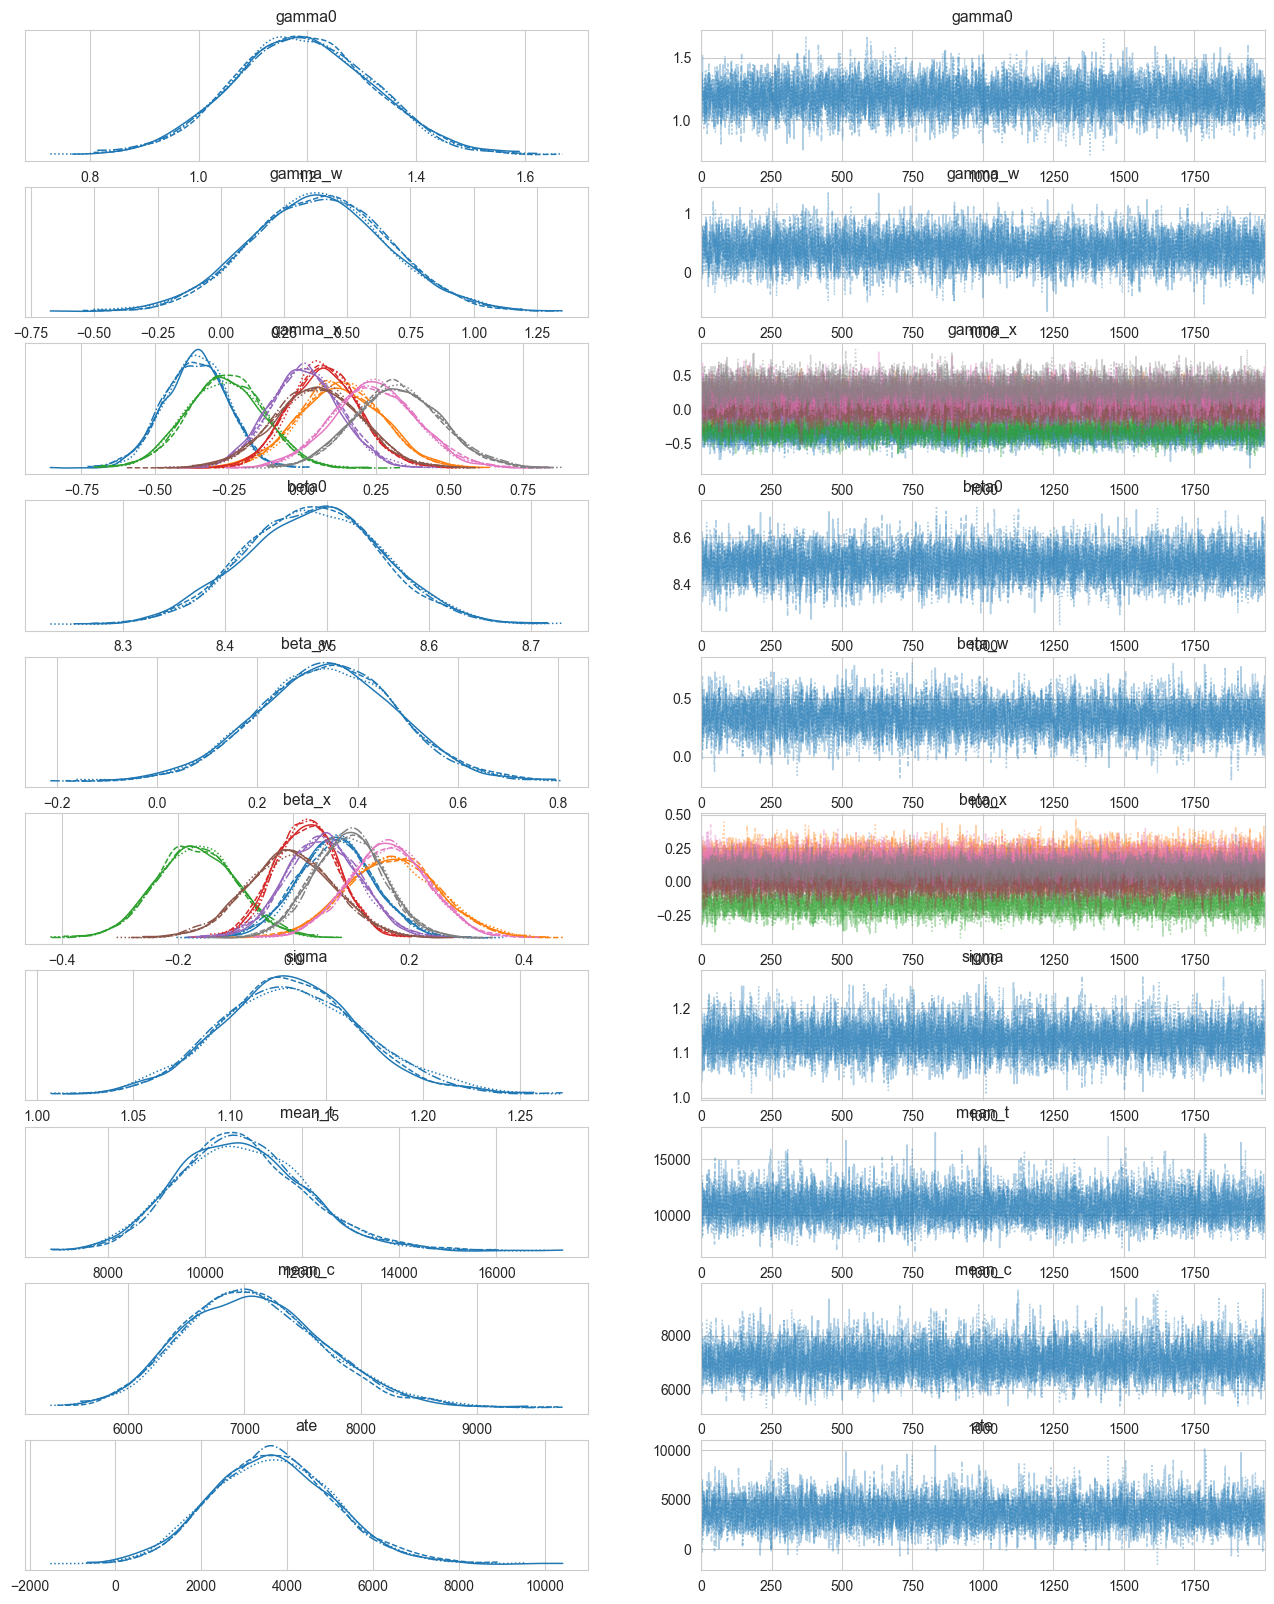

In [159]:
#Visualing trace plot
az.plot_trace(trace,figsize=(16,20))

Model converged successfully

In [160]:
#Inspecting the summary of the model
summary = az.summary(trace)
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
gamma0,1.190,0.128,0.951,1.426,0.001,0.001,8706.0,5596.0,1.0
gamma_w,0.389,0.266,-0.117,0.887,0.003,0.003,7397.0,6406.0,1.0
gamma_x[0],-0.361,0.107,-0.565,-0.171,0.001,0.001,10887.0,6360.0,1.0
gamma_x[1],0.130,0.141,-0.138,0.391,0.002,0.001,7094.0,6737.0,1.0
gamma_x[2],-0.263,0.130,-0.514,-0.031,0.001,0.001,9076.0,6703.0,1.0
gamma_x[3],0.077,0.118,-0.141,0.301,0.001,0.001,11513.0,6408.0,1.0
gamma_x[4],0.009,0.120,-0.207,0.247,0.001,0.001,10851.0,5713.0,1.0
gamma_x[5],0.054,0.146,-0.217,0.327,0.002,0.002,7026.0,6517.0,1.0
gamma_x[6],0.244,0.143,-0.015,0.523,0.001,0.002,9305.0,5979.0,1.0
gamma_x[7],0.325,0.147,0.048,0.600,0.001,0.002,9791.0,6444.0,1.0


<Axes: >

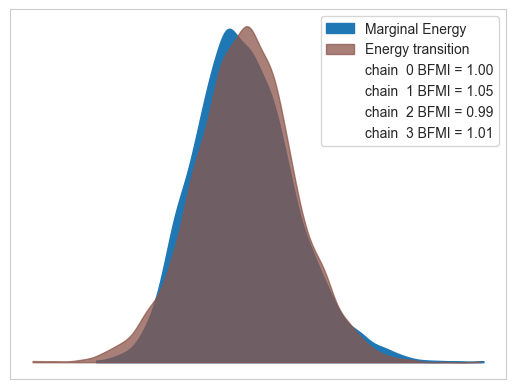

In [161]:
#Inspecting enery plot
az.plot_energy(trace)

array([[<Axes: title={'center': 'gamma0'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'gamma_w'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'gamma_x\n0'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'gamma_x\n1'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'gamma_x\n2'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'gamma_x\n3'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'gamma_x\n4'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'gamma_x\n5'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'gamma_x\n6'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'gamma_x\n7'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'beta0'}, xlabel='Total number of

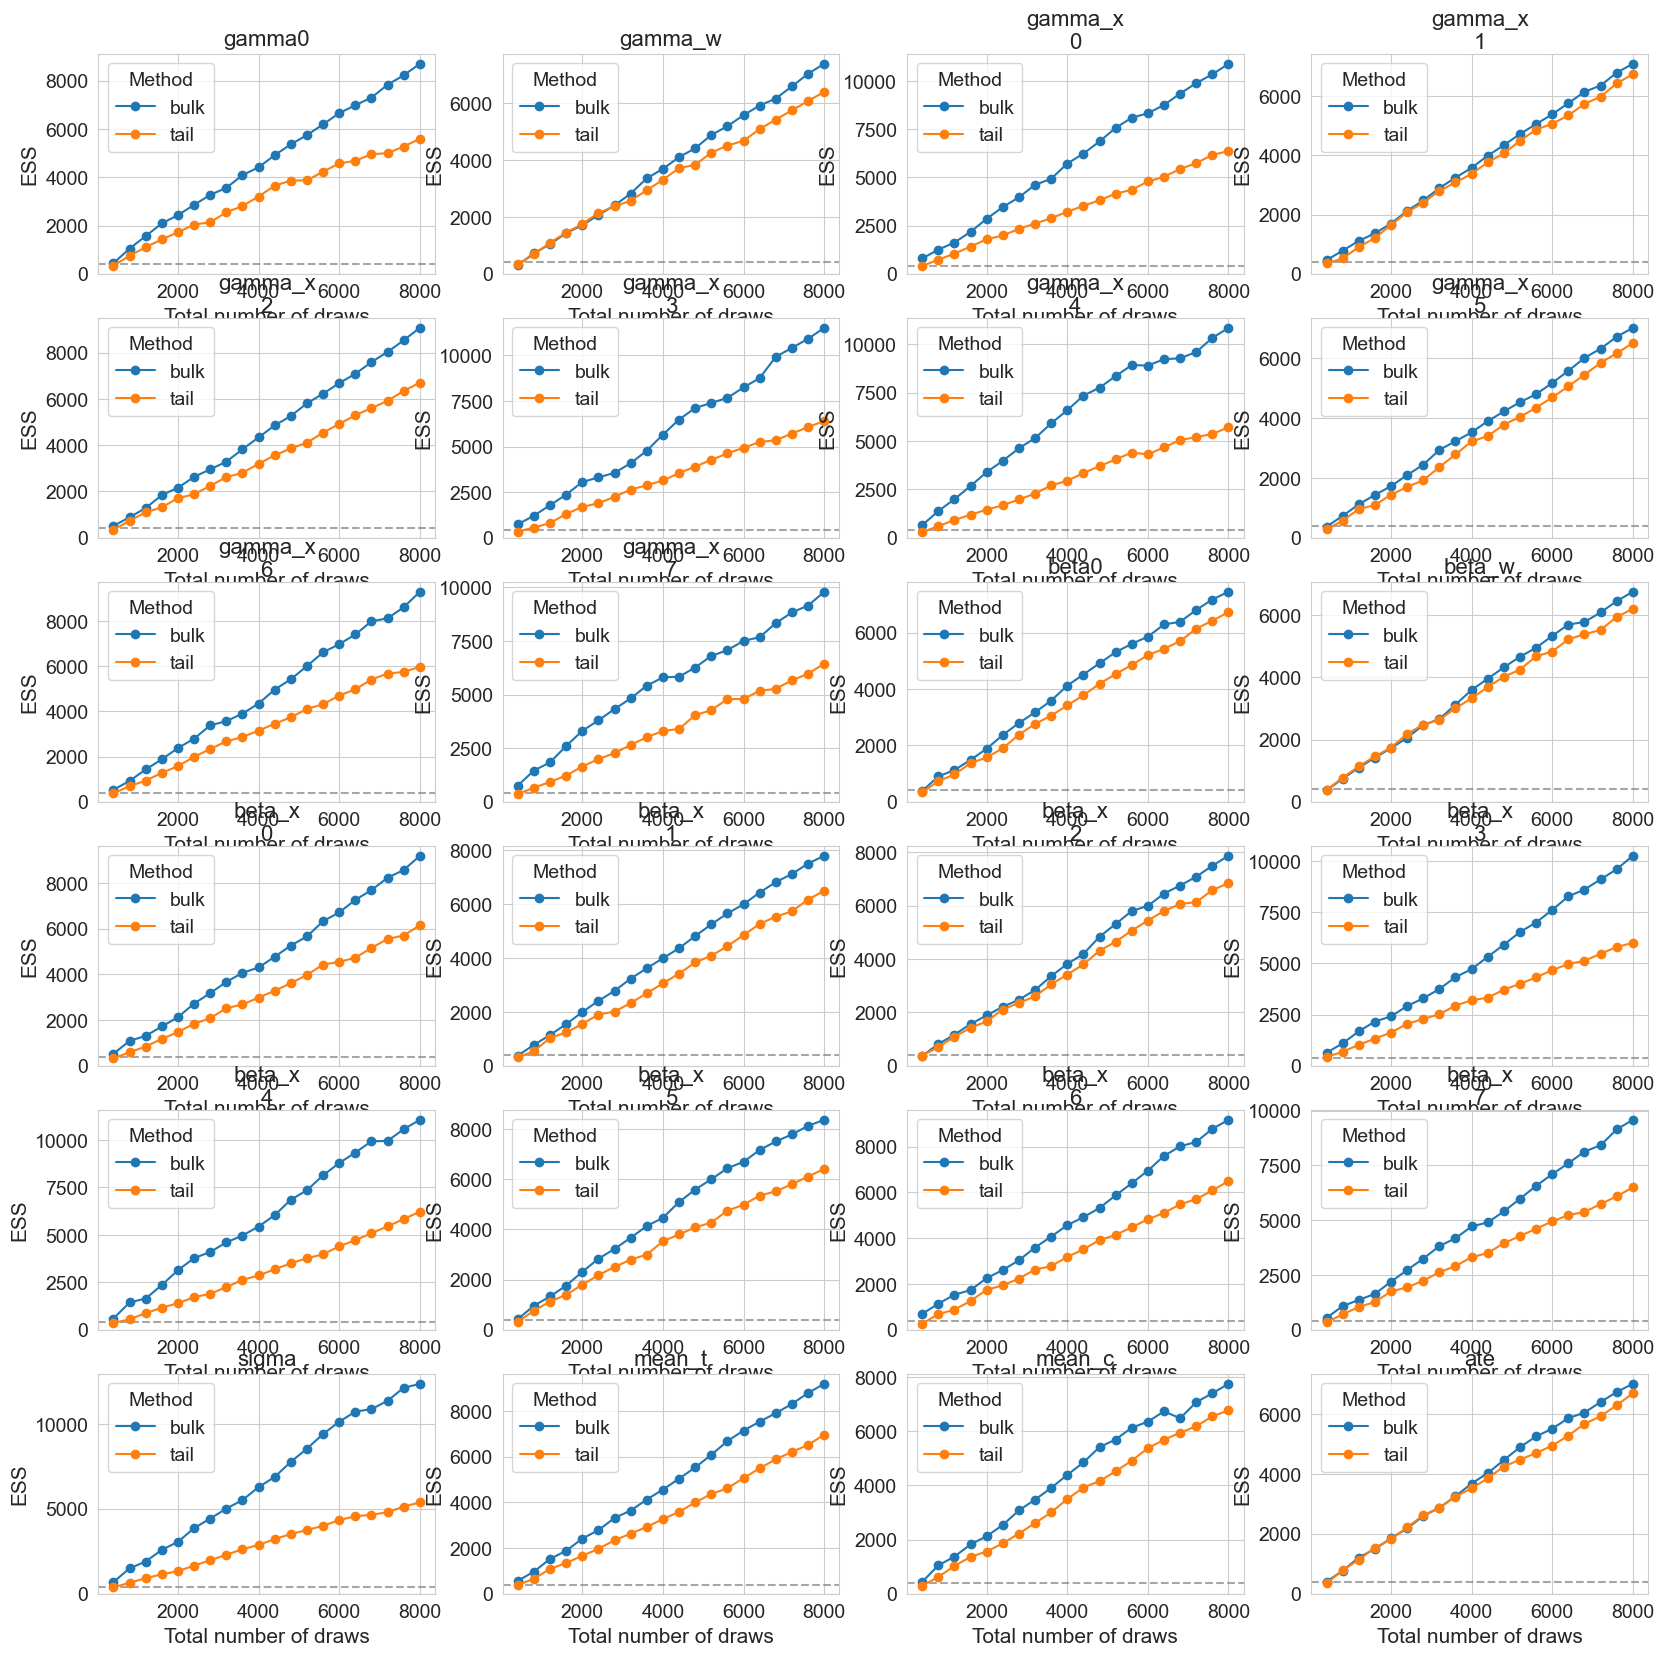

In [162]:
#Plotting effective sample size
az.plot_ess(trace, kind="evolution",figsize=(20,20))

In [163]:
#Sampling the posterior predictive
with causal_model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

Sampling: [obs_earnings, obs_employment]


Output()

array([<Axes: xlabel='obs_employment'>, <Axes: xlabel='obs_earnings'>],
      dtype=object)

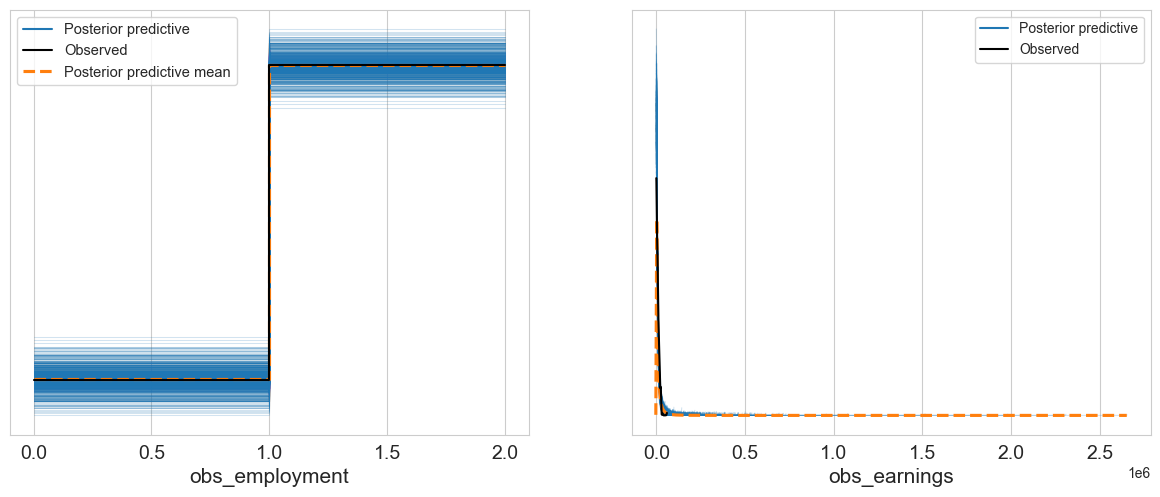

In [172]:
#Visualize posterior predictive checks
az.plot_ppc(trace, group="posterior", num_pp_samples=500)

PPC shows good predictive capabilities of the model

age:0
educ:1
black:2
hispan:3
married:4
nodegree:5
re74:6
re75:7


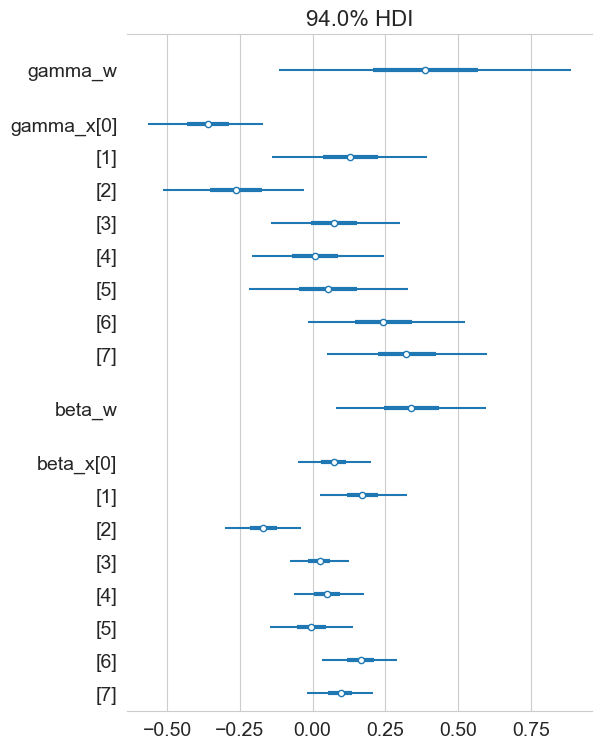

In [233]:
az.plot_forest(trace, var_names=["~mean_c", "~mean_t", "~ate", "~sigma", "~gamma0", "~beta0"], combined=True)
print("age:0") 
print("educ:1") 
print("black:2")
print("hispan:3") 
print("married:4")
print("nodegree:5")
print("re74:6")
print("re75:7")

array([<Axes: title={'center': 'mean_c'}>,
       <Axes: title={'center': 'mean_t'}>], dtype=object)

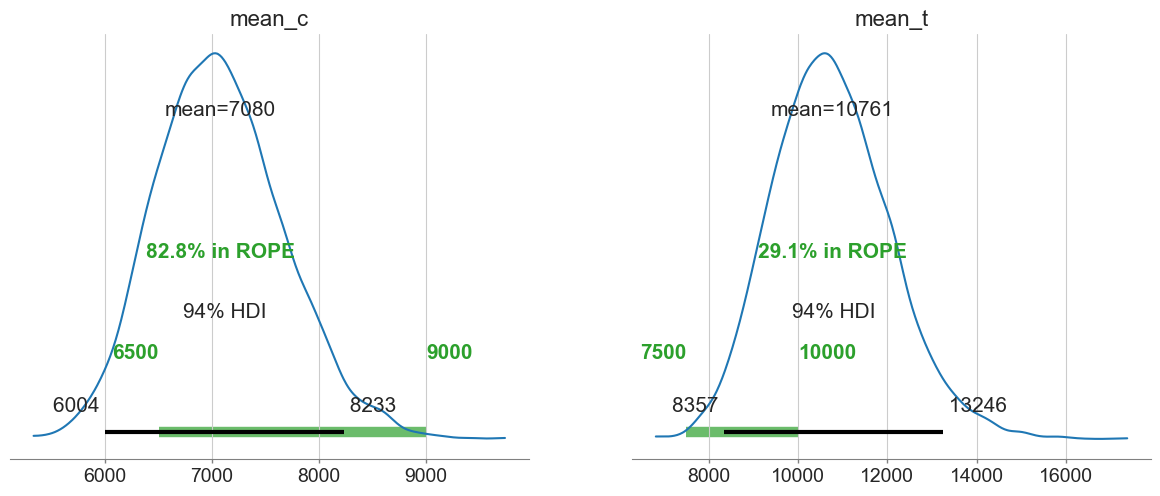

In [234]:
rope = {
    'mean_c': [{"rope": (6500, 9000)}],
    'mean_t': [{"rope": (7500, 10000)}]
    }

az.plot_posterior(trace, var_names=["mean_c", "mean_t"],rope=rope)

array([<Axes: title={'center': 'gamma_w'}>,
       <Axes: title={'center': 'beta_w'}>], dtype=object)

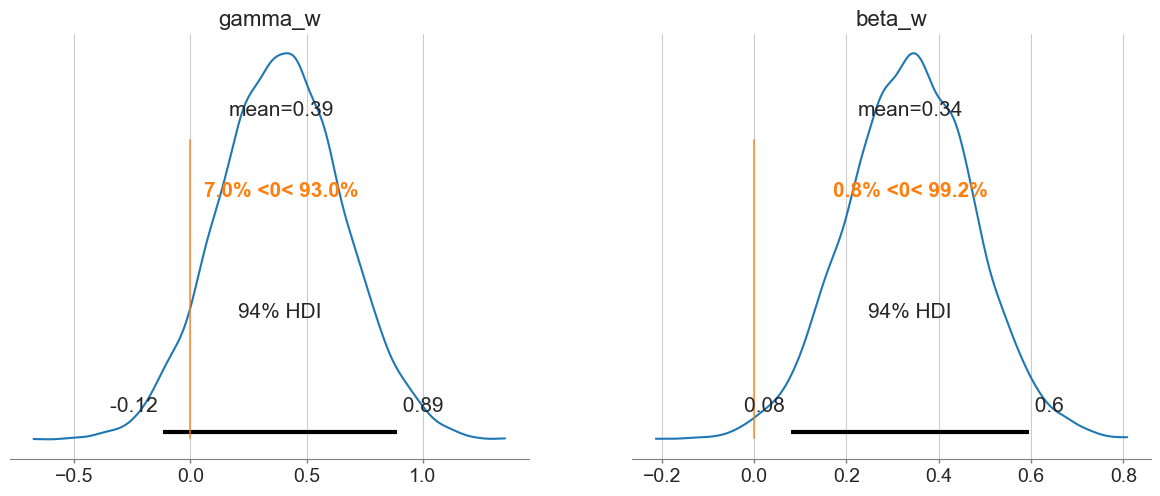

In [166]:
az.plot_posterior(trace, var_names=["gamma_w", "beta_w"],ref_val=0)

Both employment rates and salary increase are substantial<br>
* employment rate is with 93% confidence
* salary increase is with 99.2% confidence

<Axes: title={'center': 'ate'}>

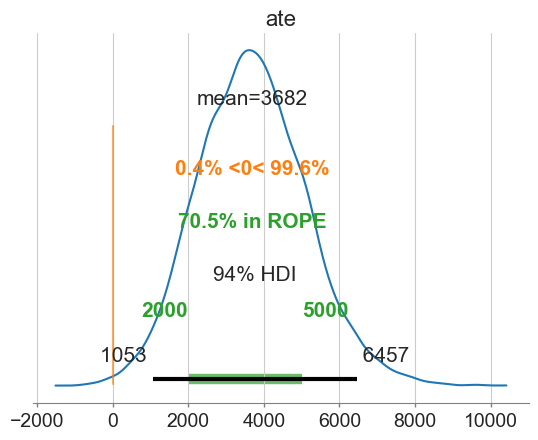

In [211]:
az.plot_posterior(trace, var_names=["ate"],ref_val=0, rope=[2000,5000])

Mean ATE is at 3,682 $

### Final Notes:
It is noticable that the employess who were trained an increase in salary<br>
as well they had better employment rates
there are several more factors like ethnicity and educational<br>
which had noticable causal implications on salary and employment rate